# Parkinson Speech Dataset with Multiple Types of Sound Recordings

##### L'objet du devoir est de mettre en pratique les différentes compétences, nécessaires au métier de data-scientist, vues en cours cette année.


## Packages

In [3]:
import selenium
from selenium import webdriver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

## Push sur Git 

In [263]:
!git add Projet_Python_DataAnalysis.ipynb
!git commit -m "Gradient Boosting"
!git push 


[master 414b606] Gradient Boosting
 1 file changed, 149 insertions(+), 61 deletions(-)
fatal: unable to access 'https://github.com/cjacques4/Parkinson-Speech-Dataset-with-Multiple-Types-of-Sound-Recordings.git/': Could not resolve host: github.com


# 1. Téléchargement de la base de données via WebScrapping

In [ ]:
driver = webdriver.Chrome(executable_path="./chromedriver")

url = "https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings#"
driver.get(url)

In [ ]:
# Télécharger le dataset
driver.find_element_by_link_text('Data Folder').click()
xpath = '/html/body/table/tbody/tr[4]/td[2]/a'
driver.find_element_by_xpath(xpath).click()

# 2. Data Visualisation (matplotlib)

In [4]:
df = pd.read_csv ('train_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks',
                               'UPDRS', 
                               'class_information']) 
df_val = pd.read_csv ('test_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks', 
                               'class_information']) 

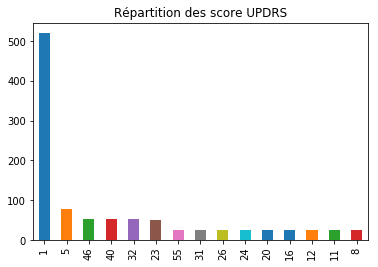

In [5]:
title = "Répartition des score UPDRS"
to_plot = df.UPDRS.value_counts(dropna=False)
to_plot.plot.bar(title=title)

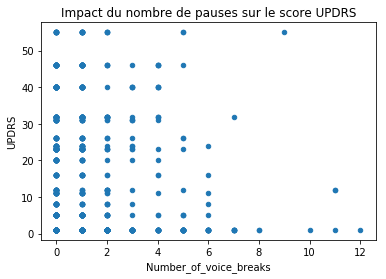

In [8]:
title = "Impact du nombre de pauses sur le score UPDRS"
df.plot.scatter("Number_of_voice_breaks", "UPDRS",title=title)

# 3. Data Préparation (pandas)

## Importer la base de données

Les fichiers téléchargés étaient en .txt, nous avons alors utilisé la fonction read_csv afin de pouvoir les traiter comme des fichiers csv,et nous avons ajouter un header avec le nom de chaque colonnes : 

In [9]:
# Nous allons utilisé df comme base d'apprentissage 
# et nous utiliserons df_val comme jeu de validation final 

df = pd.read_csv ('train_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks',
                               'UPDRS', 
                               'class_information']) 
  


df_val = pd.read_csv ('test_data.txt', delimiter=",", header=0, index_col = [0], 
                        names=['id',
                               'Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
                               'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11','Shimmer_dda', 
                               'AC','NTH','HTN', 
                               'Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch','Maximum_pitch',
                               'Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
                               'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks', 
                               'class_information']) 





##  Pré-traitement

In [10]:
df.head()

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,UPDRS,class_information
id,,,,,,,,,,,,,,,,,,,,,
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1


In [11]:
df_val.head().T

id,1,1,1,1,1
Jitter_local,0.143000,0.162000,0.140000,0.150000,0.208000
Jitter_local_absolute,0.000007,0.000008,0.000007,0.000007,0.000009
Jitter_rap,0.073000,0.087000,0.075000,0.080000,0.077000
Jitter_ppq5,0.081000,0.089000,0.089000,0.097000,0.095000
Jitter_ddp,0.219000,0.260000,0.224000,0.240000,0.230000
Shimmer_local,1.236000,1.338000,1.086000,1.049000,1.241000
Shimmer_local_dB,0.107000,0.117000,0.094000,0.091000,0.109000
Shimmer_apq3,0.612000,0.630000,0.556000,0.533000,0.487000
Shimmer_apq5,0.904000,0.948000,0.747000,0.698000,0.715000
Shimmer_apq11,0.894000,1.017000,0.823000,0.777000,1.568000


In [12]:
#We have 1039 values and 28 features in the dataset:
df.shape

(1039, 28)

In [13]:
#We have 167 values and 27 features in the dataset:
df_val.shape

(167, 27)

In [14]:
df.dtypes

Jitter_local                           float64
Jitter_local_absolute                  float64
Jitter_rap                             float64
Jitter_ppq5                            float64
Jitter_ddp                             float64
Shimmer_local                          float64
Shimmer_local_dB                       float64
Shimmer_apq3                           float64
Shimmer_apq5                           float64
Shimmer_apq11                          float64
Shimmer_dda                            float64
AC                                     float64
NTH                                    float64
HTN                                    float64
Median_pitch                           float64
Mean_pitch                             float64
Standard_deviation                     float64
Minimum_pitch                          float64
Maximum_pitch                          float64
Number_of_pulses                         int64
Number_of_periods                        int64
Mean_period  

### Visualisation des NA

Ici nous avons de la chance car notre base de données est très propre, elle ne contient aucune valeur nulle. 

In [15]:
#Check NA test
null_counts = df_val.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Jitter_local                           0
Jitter_local_absolute                  0
Jitter_rap                             0
Jitter_ppq5                            0
Jitter_ddp                             0
Shimmer_local                          0
Shimmer_local_dB                       0
Shimmer_apq3                           0
Shimmer_apq5                           0
Shimmer_apq11                          0
Shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_deviation                     0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_locally

In [16]:
#Check NA train
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Jitter_local                           0
Jitter_local_absolute                  0
Jitter_rap                             0
Jitter_ppq5                            0
Jitter_ddp                             0
Shimmer_local                          0
Shimmer_local_dB                       0
Shimmer_apq3                           0
Shimmer_apq5                           0
Shimmer_apq11                          0
Shimmer_dda                            0
AC                                     0
NTH                                    0
HTN                                    0
Median_pitch                           0
Mean_pitch                             0
Standard_deviation                     0
Minimum_pitch                          0
Maximum_pitch                          0
Number_of_pulses                       0
Number_of_periods                      0
Mean_period                            0
Standard_deviation_of_period           0
Fraction_of_locally

# 4. Modélisation (scikit learn)

In [17]:
#Read data 
target = df.UPDRS
df.drop(['UPDRS'], axis='columns', inplace=True)
X = df

## Séparer le jeu de données en train et test avec une cross validation

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33)

C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Standardiser les valeurs

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Choix d'un algorithme d'apprentissage

### Support Vector Machine (SVM)

Dans un premier temps, nous allons lancer un svm avec les paramètres par défaut puis nous allons aller au-delà de ces paramètres à l’aide d’un Grid Search :

In [20]:
from sklearn import svm
algorithme = svm.SVC()
algorithme.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [21]:
from sklearn import cross_validation
cross_validation.cross_val_score(algorithme, X, target, n_jobs=-1)

array([0.49431818, 0.49712644, 0.51032448])

### Aller au delà des paramètres par défaut :

In [22]:
from sklearn import grid_search
parameters = {  'gamma' : [0.1,0.01, 0.001, 0.0001],
                'C'      : [100,1000, 10000],
                "probability" : [True],
                'kernel' : ['rbf', 'poly', 'sigmoid','linear'],
                "degree" : [1,3,5]}

grid_svm       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)

grid_svm.fit(X_train, y_train)

print (grid_svm.best_score_, grid_svm.best_estimator_)

C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.7370689655172413 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Random Forest

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

algorithme2 = RandomForestClassifier() 


parameters = {  "n_estimators"         : [ 10, 100, 1000 ], 
                "min_samples_leaf"     : [  3,   1,   7 ],
                "criterion"            : ["gini", "entropy"] }

grid_rf       = grid_search.GridSearchCV(algorithme2, parameters, n_jobs=-1)

grid_rf.fit(X_train, y_train)

print (grid_rf.best_score_, grid_rf.best_estimator_)

0.735632183908046 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Gradient Boosting 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier


algorithme3 = GradientBoostingClassifier()
algorithme3.get_params()


parameters = {'n_estimators': [10,100,200]                 ,
                  'max_depth': None                        ,
                  'min_samples_split': [2,7,3]             ,
                  'learning_rate': [0.01,0.1, 0,2]              ,
                  'loss': 'ls'                             }



grid_gb     = grid_search.GridSearchCV(algorithme3, {})

grid_gb.fit(X_train, y_train)

print (grid_gb.best_score_, grid_gb.best_estimator_)

0.7198275862068966 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.68


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.74


## K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.67


## Linear Discriminant Analysis

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.51
Accuracy of LDA classifier on test set: 0.56


## Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.71
Accuracy of GNB classifier on test set: 0.71


## Support Vector Machine

In [33]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.79
Accuracy of SVM classifier on test set: 0.71


The decision tree algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.



In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[179   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  16   1   0   0   0   1   1   2   3   1   1   0   1   0]
 [  0   2   2   0   0   1   0   0   1   0   0   1   3   3   0]
 [  0   2   0   5   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   5   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   1   4   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   2   0   1   1   0   0   1   0   1]
 [  0   4   0   0   0   0   0  11   0   0   2   0   0   1   0]
 [  0   2   0   0   0   0   0   0   1   0   0   0   0   2   0]
 [  0   0   0   0   0   0   1   2   0   3   0   0   0   0   0]
 [  0   4   0   0   0   0   0   1   0   0   2   0   0   0   0]
 [  0   0   0   0   0   1   0   1   1   2   0   8   2   4   0]
 [  0   3   2   1   0   0   0   0   0   1   0   0   4   2   0]
 [  0   1   0   0   1   0   0   0   3   0   1   1   3   9   0]
 [  0   1   1   1   0   1   0   0   0   0   0   0   0   0   2]]
             precision    recall  f1-score   support



# 5. Visualisation des performances

# Tester tous les algos

In [37]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in sklearn.__dict__['__all__']:    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [38]:
algos = get_sklearn_algorithms(True)
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))

['_ASSUME_FINITE', '__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_contextmanager', 'base', 'clone', 'config_context', 'covariance', 'cross_validation', 'discriminant_analysis', 'ensemble', 'exceptions', 'externals', 'feature_selection', 'gaussian_process', 'get_config', 'grid_search', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'multiclass', 'naive_bayes', 'neighbors', 'os', 'preprocessing', 'random_projection', 're', 'set_config', 'setup_module', 'svm', 'sys', 'tree', 'utils', 'warnings']
calibration
 nom algorithme  =  CalibratedClassifierCV
 nom algorithme  =  IsotonicRegression
 nom algorithme  =  LabelBinarizer
 nom algorithme  =  LabelEncoder
 nom algorithme  =  LinearSVC
 nom algorithme  =  _CalibratedClassifier
 nom algorithme  =  _SigmoidCalibration
cluster
 nom algorithme  =  AffinityPropagation
 nom algorithme  =  Agg

C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


 SGDRegressor
 nom algorithme  =  TheilSenRegressor
manifold
 nom algorithme  =  Isomap
 nom algorithme  =  LocallyLinearEmbedding
 nom algorithme  =  MDS
 nom algorithme  =  SpectralEmbedding
 nom algorithme  =  TSNE
metrics
mixture
 nom algorithme  =  BayesianGaussianMixture
 nom algorithme  =  DPGMM
 nom algorithme  =  GMM
 nom algorithme  =  GaussianMixture
 nom algorithme  =  VBGMM
model_selection
 nom algorithme  =  GridSearchCV
 nom algorithme  =  RandomizedSearchCV
multiclass
 nom algorithme  =  LabelBinarizer
 nom algorithme  =  OneVsOneClassifier
 nom algorithme  =  OneVsRestClassifier
 nom algorithme  =  OutputCodeClassifier
 nom algorithme  =  _ConstantPredictor
multioutput
 nom algorithme  =  ClassifierChain
 nom algorithme  =  MultiOutputClassifier
 nom algorithme  =  MultiOutputEstimator
 nom algorithme  =  MultiOutputRegressor
naive_bayes
 nom algorithme  =  BaseDiscreteNB
 nom algorithme  =  BernoulliNB
 nom algorithme  =  GaussianNB
 nom algorithme  =  LabelBinarizer


In [39]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [40]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print("="*30)

Probability calibration w
0.6967930029154519
Isotonic regression model
X should be a 1d array
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode labels with value
fit() takes 2 positional arguments but 3 were give
Linear Support Vector Cla
0.6997084548104956
__init__() missing 1 required positional argument:
Sigmoid regression model.
bad input shape (696, 27)
Perform Affinity Propagat
'AffinityPropagation' object has no attribute 'sco
Agglomerative Cluste
'AgglomerativeClustering' object has no attribute 
Implements the Birch clus
'Birch' object has no attribute 'score'
Perform DBSCAN clustering
'DBSCAN' object has no attribute 'score'
Agglomerate features.
'FeatureAgglomeration' object has no attribute 'sc
K-Means clustering

    R
-3874.986020897769
Mean shift clustering usi
'MeanShift' object has no attribute 'score'
Mini-Batch K-Means cluste
-3969.8807293298833
Spectral biclustering (Kl
'SpectralBiclustering' object has no attribute 'sc
Apply cluste

C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\covariance\graph_lasso_.py:252: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -7.326e-02
  ConvergenceWarning)
C:\Users\Clement\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)


-13.510731153852284
Sparse inverse covariance
-24.450344700301756
LedoitWolf Estimator
-14.79526003446317
Minimum Covariance Determ
-143.64621407188267
Oracle Approximating Shri
-13.155979841177015
Covariance estimator with
-19.600371099454502
CCA Canonical Correlation


C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:287: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


-0.008458257280370418
PLSCanonical implements
-1.055327887153728
PLS regression

    PLSRe
0.43646986250833736
Partial Least Square SVD
'PLSSVD' object has no attribute 'score'
Dictionary learning
'DictionaryLearning' object has no attribute 'scor
Factor Analysis (FA)
-23.975088063205487
FastICA
'FastICA' object has no attribute 'score'
Incremental principal com
'IncrementalPCA' object has no attribute 'score'
Kernel Principal componen
'KernelPCA' object has no attribute 'score'
Latent Dirichlet Allocati
Negative values in data passed to LatentDirichletA
Mini-batch dictionary lea
'MiniBatchDictionaryLearning' object has no attrib
Mini-batch Sparse Princip
'MiniBatchSparsePCA' object has no attribute 'scor
Non-Negative Matrix Facto
Negative values in data passed to NMF (input X)
Principal component analy
1.4523243803598593
Principal component analy
'RandomizedPCA' object has no attribute 'score'
__init__() missing 1 required positional argument:
Sparse Principal Componen
'SparsePCA' obj

C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\

-1.2976093017458439
Randomized Lasso.

    Ra
'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
'RandomizedLogisticRegression' object has no attri
Linear least squares with
0.5690368821654682
Ridge regression with bui
0.5708203635676132
Classifier using Ridge re
0.6763848396501457
Ridge classifier with bui
0.6705539358600583
Linear classifiers (SVM,
0.6938775510204082
Linear model fitted by mi
0.5735311827670322
Theil-Sen Estimator


C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5150647465793418
Isomap Embedding

    Non
'Isomap' object has no attribute 'score'
Locally Linear Embedding
'LocallyLinearEmbedding' object has no attribute '
Multidimensional scaling
'MDS' object has no attribute 'score'
Spectral embedding for no
'SpectralEmbedding' object has no attribute 'score
t-distributed Stochastic
'TSNE' object has no attribute 'score'
Variational Bayesian esti
-2.1624684029451924
Dirichlet Process Gaussia
[ -46.56930388  -46.35478272  -51.92661649  -46.84096812  -50.81280324
  -59.29418107  -46.77273928  -48.86424345  -44.5511278   -55.67194056
  -45.98167137  -51.85529526  -46.47839119  -48.82377703  -46.03825231
  -47.40325708  -48.05528182  -48.34330427  -50.31868988 -126.4535327
  -48.5451197   -47.33186316  -49.08758499  -46.9039279   -48.7262006
  -46.26009438  -48.20749595  -47.76087786  -50.12950192  -45.3623125
  -47.88995225  -46.62010873  -48.46228897  -48.32600694  -48.33784064
  -47.08334731  -46.38866771  -47.72600799  -45.15950105  -54.649992

C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\random_projection.py:378: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (27 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


'LSHForest' object has no attribute 'score'
Unsupervised Outlier Dete
'LocalOutlierFactor' object has no attribute 'scor
Nearest centroid classifi
0.31486880466472306
Unsupervised learner for
'NearestNeighbors' object has no attribute 'score'
Classifier implementing a
Algo de classification
Regression based on neigh


C:\Users\Clement\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Clement\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Input contains NaN, infinity or a value too large 
Bernoulli Restricted Bolt
'BernoulliRBM' object has no attribute 'score'
Multi-layer Perceptron cl


C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7405247813411079
Multi-layer Perceptron re
0.578625185515599
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Imputation transformer fo
'Imputer' object has no attribute 'score'
Center a kernel matrix
'KernelCenterer' object has no attribute 'score'
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode labels with value
fit() takes 2 positional arguments but 3 were give
Scale each feature by its
'MaxAbsScaler' object has no attribute 'score'
Transforms features by sc
'MinMaxScaler' object has no attribute 'score'
Transform between iterabl
fit() takes 2 positional arguments but 3 were give
Normalize samples individ
'Normalizer' object has no attribute 'score'
Encode categorical intege
X needs to contain only non-negative integers.
Generate polynomial and i
'Po

C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.6997084548104956
LabelSpreading model for
0.6997084548104956
Linear Support Vector Cla
0.6967930029154519
Linear Support Vector Reg
0.5541000796646298
Nu-Support Vector Classif
specified nu is infeasible
Nu Support Vector Regress
0.3347277721181424
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
0.7055393586005831
Epsilon-Support Vector Re
0.3895134201875381
'module' object is not callable
A decision tree classifie
0.717201166180758
A decision tree regressor
0.31229794480592055
An extremely randomized t
0.6822157434402333
An extremely randomized t
0.27778716910363777
Linear Discriminant Analy
0.5597667638483965
Quadratic Discriminant An
0.641399416909621
Standardize features by r
'StandardScaler' object has no attribute 'score'


C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Clement\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [41]:
best_algorithm

EmpiricalCovariance(assume_centered=False, store_precision=True)

In [167]:
performances

{'Probability calibration w': [0.7026239067055393],
 'Linear Support Vector Cla': [0.7259475218658892],
 'An object for detecting o': [0.4839650145772595],
 'PLS regression\n\n    PLSRe': [0.5270065539045051],
 'DummyClassifier is a': [0.2944606413994169],
 'An AdaBoost classifier.': [0.6384839650145773],
 'An AdaBoost regressor.': [0.6104977834563081],
 'A Bagging classifier.': [0.7696793002915452],
 'A Bagging regressor.': [0.6214315237047534],
 'An extra-trees classifier': [0.7551020408163265],
 'An extra-trees regressor.': [0.6560819399446576],
 'Gradient Boosting for cla': [0.7813411078717201],
 'Gradient Boosting for reg': [0.6609979529303174],
 'A random forest classifie': [0.7434402332361516],
 'A random forest regressor': [0.6206671393661058],
 'The legacy Gaussian Proce': [0.436940933291642],
 'Gaussian process classifi': [0.7288629737609329],
 'Gaussian process regressi': [0.07147842153441275],
 'Bayesian ARD regression.': [0.6137364117474575],
 'Bayesian ridge regression': 

In [42]:
import pandas as pd
df_performances = pd.DataFrame(performances).T

col_name = "performance"
df_performances.columns = [col_name]

df_performances = df_performances.sort_values(col_name)

In [169]:
df_performances

,performance
Gaussian process regressi,0.071478
DummyClassifier is a,0.294461
Nu Support Vector Regress,0.312766
Nearest centroid classifi,0.317784
Epsilon-Support Vector Re,0.322957
An extremely randomized t,0.348561
Passive Aggressive Regres,0.422001
The legacy Gaussian Proce,0.436941
A decision tree regressor,0.481307
An object for detecting o,0.483965


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

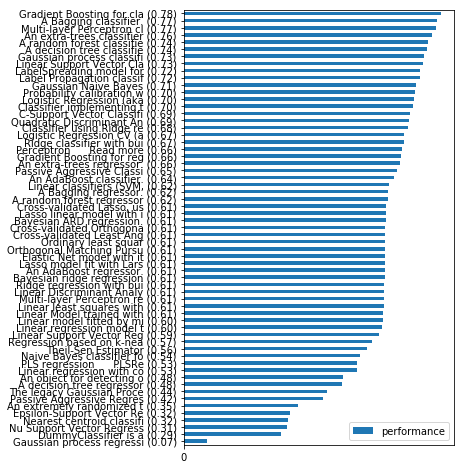

In [171]:
new_labels = []
for i, index in enumerate(df_performances.index):
    new_label = "%s (%.2f)"%(index,df_performances.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df_performances.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df_performances.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass